# India House Price data

In [1]:
# ! pip install matplotlib==3.7.3

In [92]:
import sys
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

module_path = Path.cwd().parent
# print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
# print(sys.path)
import settings
# from kaggle import settingsb
%matplotlib inline

In [93]:
import matplotlib
matplotlib.__version__

'3.7.3'

In [94]:
! poetry show | grep matplotlib

matplotlib                               3.7.3        Python plotting package
matplotlib-inline                        0.1.6        Inline Matplotlib bac...


In [95]:
! pip freeze | grep matplotlib

matplotlib==3.7.1
matplotlib-inline @ file:///home/conda/feedstock_root/build_artifacts/matplotlib-inline_1660814786464/work


## Configuration

In [96]:
csv_file = settings.DATA_FOLDER /'house_prices_clean.csv'

In [97]:
df = pd.read_csv(csv_file)

df.shape

(29451, 270)

In [98]:
df.sample(5)

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,targetprice_in_lacs,posted_by_Builder,...,city_Vellore,city_Vidisha,city_Vijayawada,city_Visakhapatnam,city_Visnagar,city_Vizianagaram,city_Warangal,city_Wardha,city_Washim,city_Yavatmal
10067,1,1,3,"1,178.97",0,1,18.80,73.32,72.00,0,...,0,0,0,0,0,0,0,0,0,0
3341,0,0,3,"1,992.88",1,1,13.10,77.50,140.00,0,...,0,0,0,0,0,0,0,0,0,0
22146,1,1,3,"1,019.36",0,1,28.38,77.37,25.80,0,...,0,0,0,0,0,0,0,0,0,0
19559,0,0,1,600.05,1,1,18.58,73.98,23.00,0,...,0,0,0,0,0,0,0,0,0,0
27381,0,0,5,"5,460.27",1,1,18.54,73.84,850.00,0,...,0,0,0,0,0,0,0,0,0,0


## EDA

In [100]:
df.isna().sum()

under_construction    0
rera                  0
bhk_no                0
square_ft             0
ready_to_move         0
                     ..
city_Vizianagaram     0
city_Warangal         0
city_Wardha           0
city_Washim           0
city_Yavatmal         0
Length: 270, dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Columns: 270 entries, under_construction to city_Yavatmal
dtypes: float64(4), int64(266)
memory usage: 60.7 MB


In [102]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
df.describe()

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,targetprice_in_lacs,posted_by_Builder,...,city_Vellore,city_Vidisha,city_Vijayawada,city_Visakhapatnam,city_Visnagar,city_Vizianagaram,city_Warangal,city_Wardha,city_Washim,city_Yavatmal
count,"29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00",...,"29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00"
mean,0.18,0.32,2.39,"19,802.17",0.82,0.93,21.30,76.84,142.90,0.02,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
std,0.38,0.47,0.88,"1,901,334.91",0.38,0.26,6.21,10.56,656.88,0.14,...,0.01,0.01,0.05,0.08,0.01,0.02,0.01,0.02,0.01,0.01
min,0.00,0.00,1.00,3.00,0.00,0.00,-37.71,-121.76,0.25,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,2.00,900.02,1.00,1.00,18.45,73.80,38.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,2.00,"1,175.06",1.00,1.00,20.75,77.32,62.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,1.00,3.00,"1,550.69",1.00,1.00,26.90,77.83,100.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,20.00,"254,545,454.50",1.00,1.00,59.91,152.96,"30,000.00",1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


/tmp/ipykernel_3464827/1920561762.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


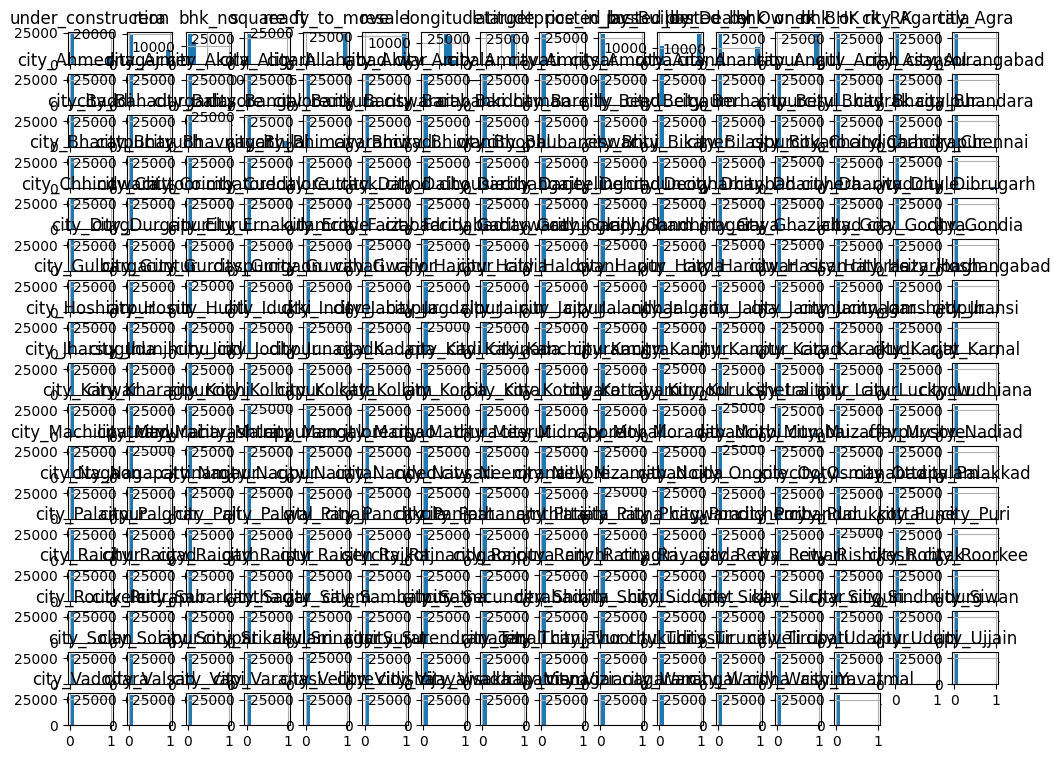

In [103]:
df.hist(figsize=(12,9))
plt.tight_layout()
plt.show()

/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/

<Axes: >

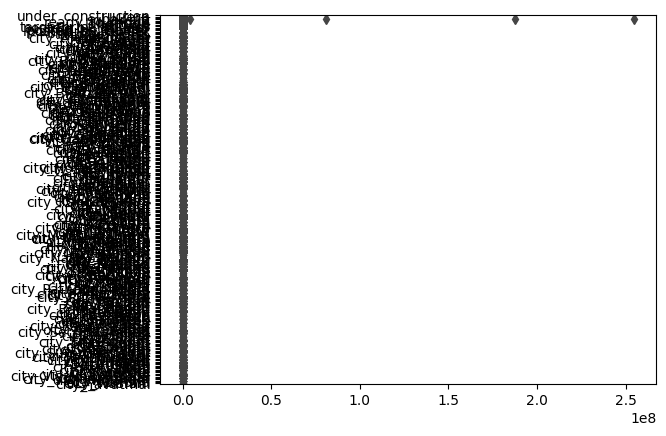

In [104]:
    sns.boxplot(data=df, orient='h')

### Categories

In [71]:

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().round(2), annot=True, cmap='YlGnBu', annot_kws={"size": 10})
#sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

ValueError: could not convert string to float: 'Ksfc Layout,Bangalore'

<Figure size 2000x1000 with 0 Axes>

In [15]:
import matplotlib
print(f'Pandas    : {pd.__version__}')
print(f'Seaborn   : {sns.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')

Pandas    : 2.1.1
Seaborn   : 0.12.2
Matplotlib: 3.7.3


In [16]:
! cat /etc/os-release

NAME="Pop!_OS"
VERSION="22.04 LTS"
ID=pop
ID_LIKE="ubuntu debian"
PRETTY_NAME="Pop!_OS 22.04 LTS"
VERSION_ID="22.04"
HOME_URL="https://pop.system76.com"
SUPPORT_URL="https://support.system76.com"
BUG_REPORT_URL="https://github.com/pop-os/pop/issues"
PRIVACY_POLICY_URL="https://system76.com/privacy"
VERSION_CODENAME=jammy
UBUNTU_CODENAME=jammy
LOGO=distributor-logo-pop-os


In [105]:
df.corr()

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,targetprice_in_lacs,posted_by_Builder,...,city_Vellore,city_Vidisha,city_Vijayawada,city_Visakhapatnam,city_Visnagar,city_Vizianagaram,city_Warangal,city_Wardha,city_Washim,city_Yavatmal
under_construction,1.00,0.36,-0.04,-0.00,-1.00,-0.35,0.01,-0.00,0.06,0.19,...,-0.00,-0.00,-0.00,0.05,-0.00,-0.00,0.02,-0.01,-0.00,-0.00
rera,0.36,1.00,0.01,-0.01,-0.36,-0.27,0.10,-0.07,0.07,0.11,...,-0.00,-0.00,-0.02,-0.04,-0.00,-0.02,-0.01,-0.01,-0.00,-0.01
bhk_no,-0.04,0.01,1.00,0.01,0.04,0.01,0.07,0.05,0.11,-0.02,...,0.00,0.04,-0.00,0.01,-0.00,-0.01,-0.01,-0.01,-0.00,-0.00
square_ft,-0.00,-0.01,0.01,1.00,0.00,0.00,-0.01,0.00,0.40,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
ready_to_move,-1.00,-0.36,0.04,0.00,1.00,0.35,-0.01,0.00,-0.06,-0.19,...,0.00,0.00,0.00,-0.05,0.00,0.00,-0.02,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
city_Vizianagaram,-0.00,-0.02,-0.01,-0.00,0.00,0.01,-0.01,0.02,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,-0.00
city_Warangal,0.02,-0.01,-0.01,-0.00,-0.02,0.00,-0.01,0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,-0.00
city_Wardha,-0.01,-0.01,-0.01,-0.00,0.01,-0.00,-0.00,0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,-0.00
city_Washim,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00
